# Student Performance Indicator

## Life cycle of Machine Learning Project

* Understand the Problem Statment

* Data Collection

* Data Checks
* Exploratory Data Analysis
* Data Preprocessing
* Model Training
* Model Evaluation

# 1.  Problem Statement:

* This project understands how the student's perfomance which is thier test score is affected by other feature/variables like Gender, Ethnicity, Parental Level of Education, Lunch, preparation etc.


Tip: Take notes of any observation from each step and communicate to the stakeholder. You also need to answer why you are performing each steps.

# 2. Data Collection: 

* Dataset source: https://www.kaggle.com/code/spscientist/student-performance-in-exams/input?select=StudentsPerformance.csv

    #### 2.1 Import the necessary libraries/packages and then import the dataset.

    



In [144]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV data as pandas DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

## 2.2 Dataset inforamtion
* gender
* race/ethnicity
* parental level of education - parents' education level
* lunch - having lunch before test
* test preparation course
* math score
* reading score
* writing score

## 3. Data Checks to perform

* Check for missing values
* check duplicates
* check data type
* check number of unique values of each column
* check statistics of dataset
* check various categories present in the different categorical column


### 3.1 Check Missing Vlaues


In [145]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total_score                    0
average                        0
dtype: int64

#### Observation 1 - There is no missing values

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

##### There is no duplicate values in the dataset.

## 3.3 Check the data types of the features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values of each column


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check the statistics of the dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight from the above check lists:

* The means for all of the scores are close to each other, falling between 66-69.5
* Same with the std.
* It seems like math is not liked by most of them. The mean of maths score is slightly less than both reading and writing score. the minimum math score is 0.0, while it's 17 and 10 for reading and writing score respectivly.

## 3.7 Exploring Data

In [12]:
print("Categories in 'gender' variables:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variables:   ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'Parental Level education' variables:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variables:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variables:   ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variables:    ['female' 'male']
Categories in 'race/ethnicity' variables:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental Level education' variables:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:    ['standard' 'free/reduced']
Categories in 'test preparation course' variables:    ['none' 'completed']


In [15]:
## Define numerical and categorical columns

numeric_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [c for c in df.columns if df[c].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.7 Add columns for "Total Score" and "Average"

In [16]:
df["total_score"] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

print(f"Number of students with full marks (100) in math: {math_full}")
print(f"Number of students with full marks (100) in reading: {reading_full}")
print(f"Number of students with full marks (100) in writing: {writing_full}")


Number of students with full marks (100) in math: 7
Number of students with full marks (100) in reading: 17
Number of students with full marks (100) in writing: 14


In [18]:
math_less_20 = df[df['math score'] <= 20]['average'].count()
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in math: {math_less_20}")
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")

Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


In [19]:
math_greater_70 = df[df['math score'] >= 70]['average'].count()
reading_greater_70 = df[df['reading score'] >= 70]['average'].count()
writing_greater_70 = df[df['writing score'] >= 70]['average'].count()

print(f"Number of students with greater than 70 marks in math: {math_greater_70}")
print(f"Number of students with greater than 70 marks in reading: {reading_greater_70}")
print(f"Number of students with greater than 70 marks in writing: {writing_greater_70}")

Number of students with greater than 70 marks in math: 409
Number of students with greater than 70 marks in reading: 513
Number of students with greater than 70 marks in writing: 489


In [20]:
math_f = df[df['math score'] <= 60]['average'].count()
reading_f = df[df['reading score'] <= 60]['average'].count()
writing_f = df[df['writing score'] <= 60]['average'].count()

print(f"Number of students fail in math: {math_f}")
print(f"Number of students fail in reading: {reading_f}")
print(f"Number of students fail in writing: {writing_f}")

Number of students fail in math: 339
Number of students fail in reading: 275
Number of students fail in writing: 301


### Insight - Observation

* From our observations we can see that maths is the least favorite subject
* Best performance is in reading
* Need to work on thier maths skills

## 4 Explotaory Data Analysis - EDA

#### 4.1 Histogram


* Compare male and female based on thier score - Average

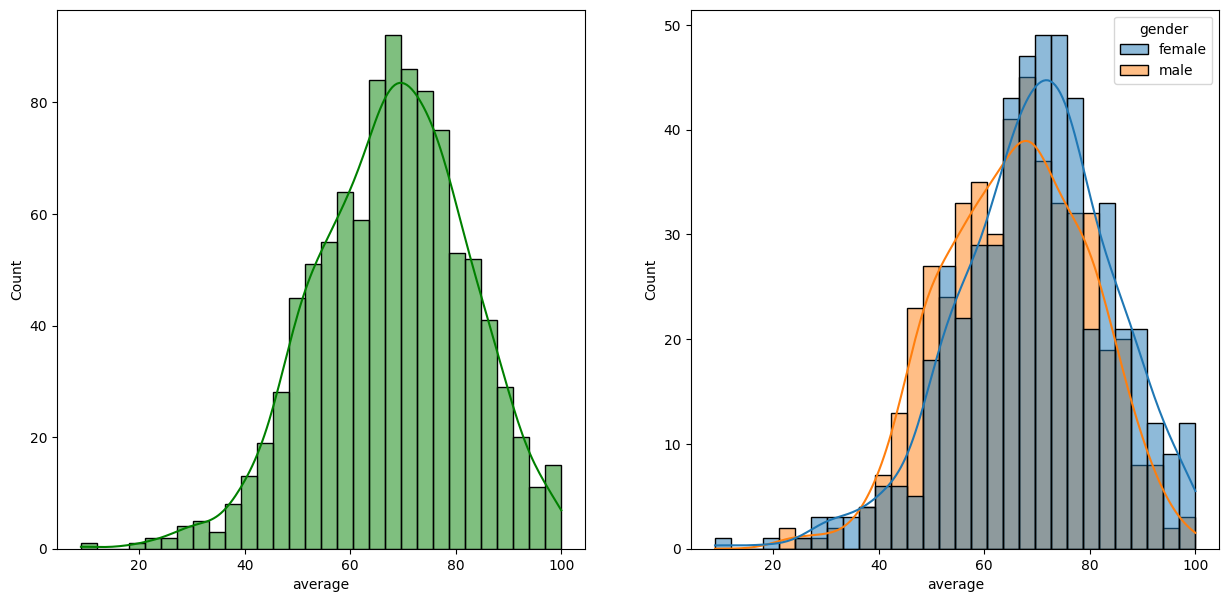

In [74]:
fig, axs = plt.subplots( 1, 2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(df, x='average', bins=30, kde=True, hue='gender')
plt.show()


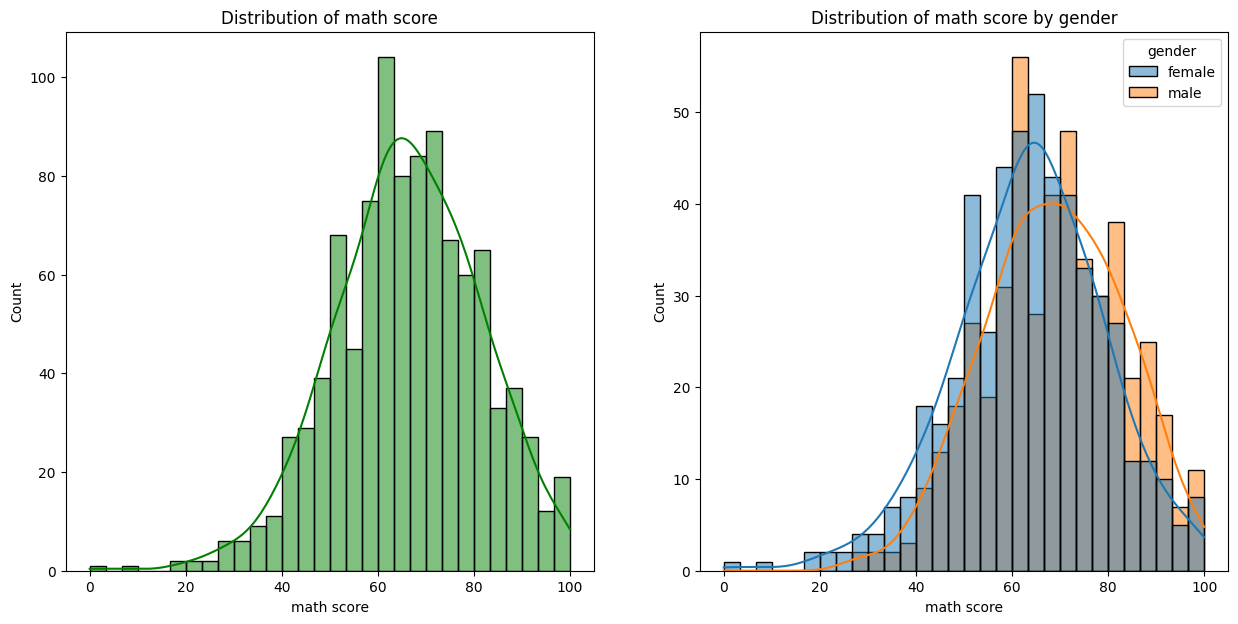

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(df, x='math score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of math score')
sns.histplot(df, x='math score', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of math score by gender')
plt.show()


### Insight

* Female students seems like they perfom better than male students.


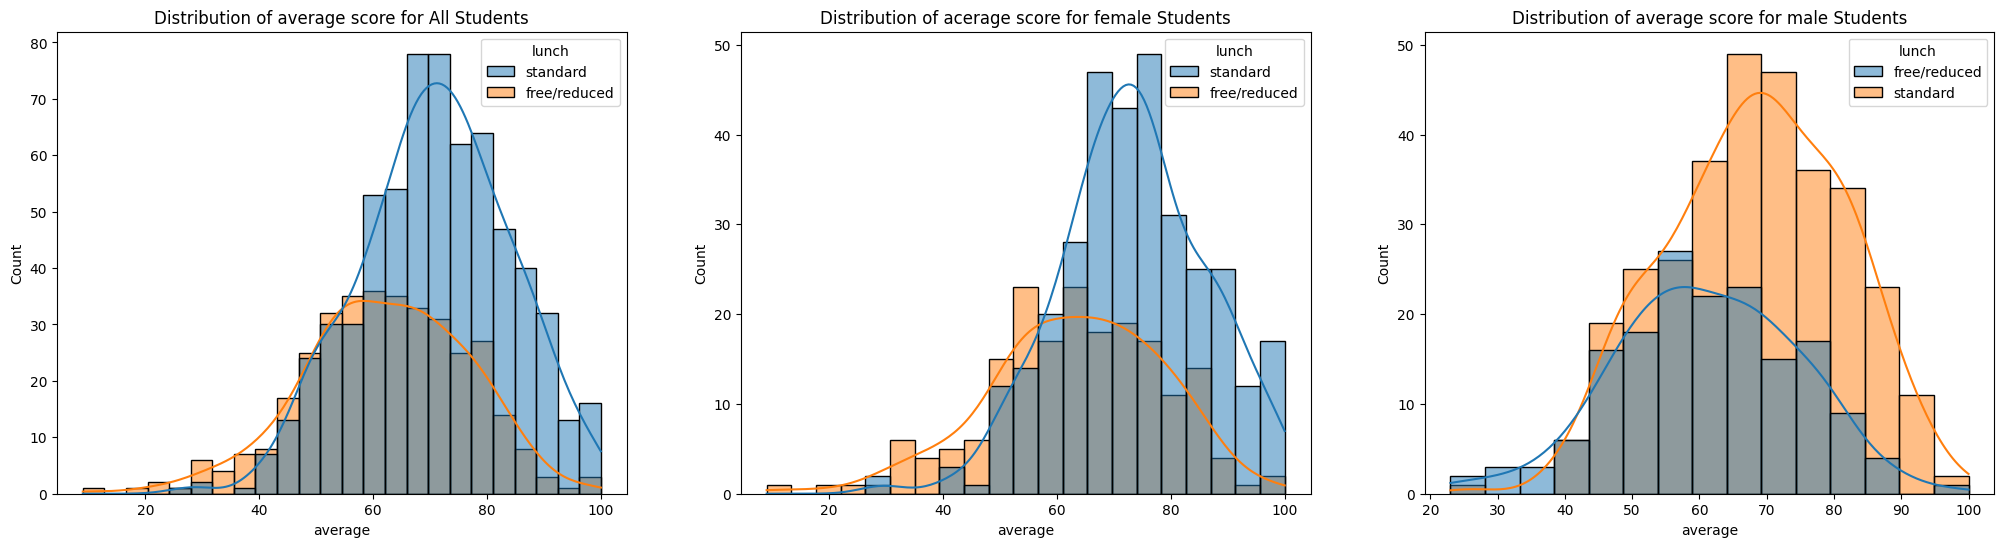

In [80]:
fig, axs = plt.subplots( 1, 3,figsize=(25,6))
sns.histplot(df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('Distribution of average score for All Students')
sns.histplot(df[df['gender']=='female'], x='average', kde=True, hue='lunch',ax=axs[1])
axs[1].set_title('Distribution of acerage score for female Students')
sns.histplot(df[df['gender']=='male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Distribution of average score for male Students')
plt.show()

### Insight

* Standard lunch helps exam score in both genders.


Now Let's see if Parental level of education has impact on students score, we can also see the effect on male vs female

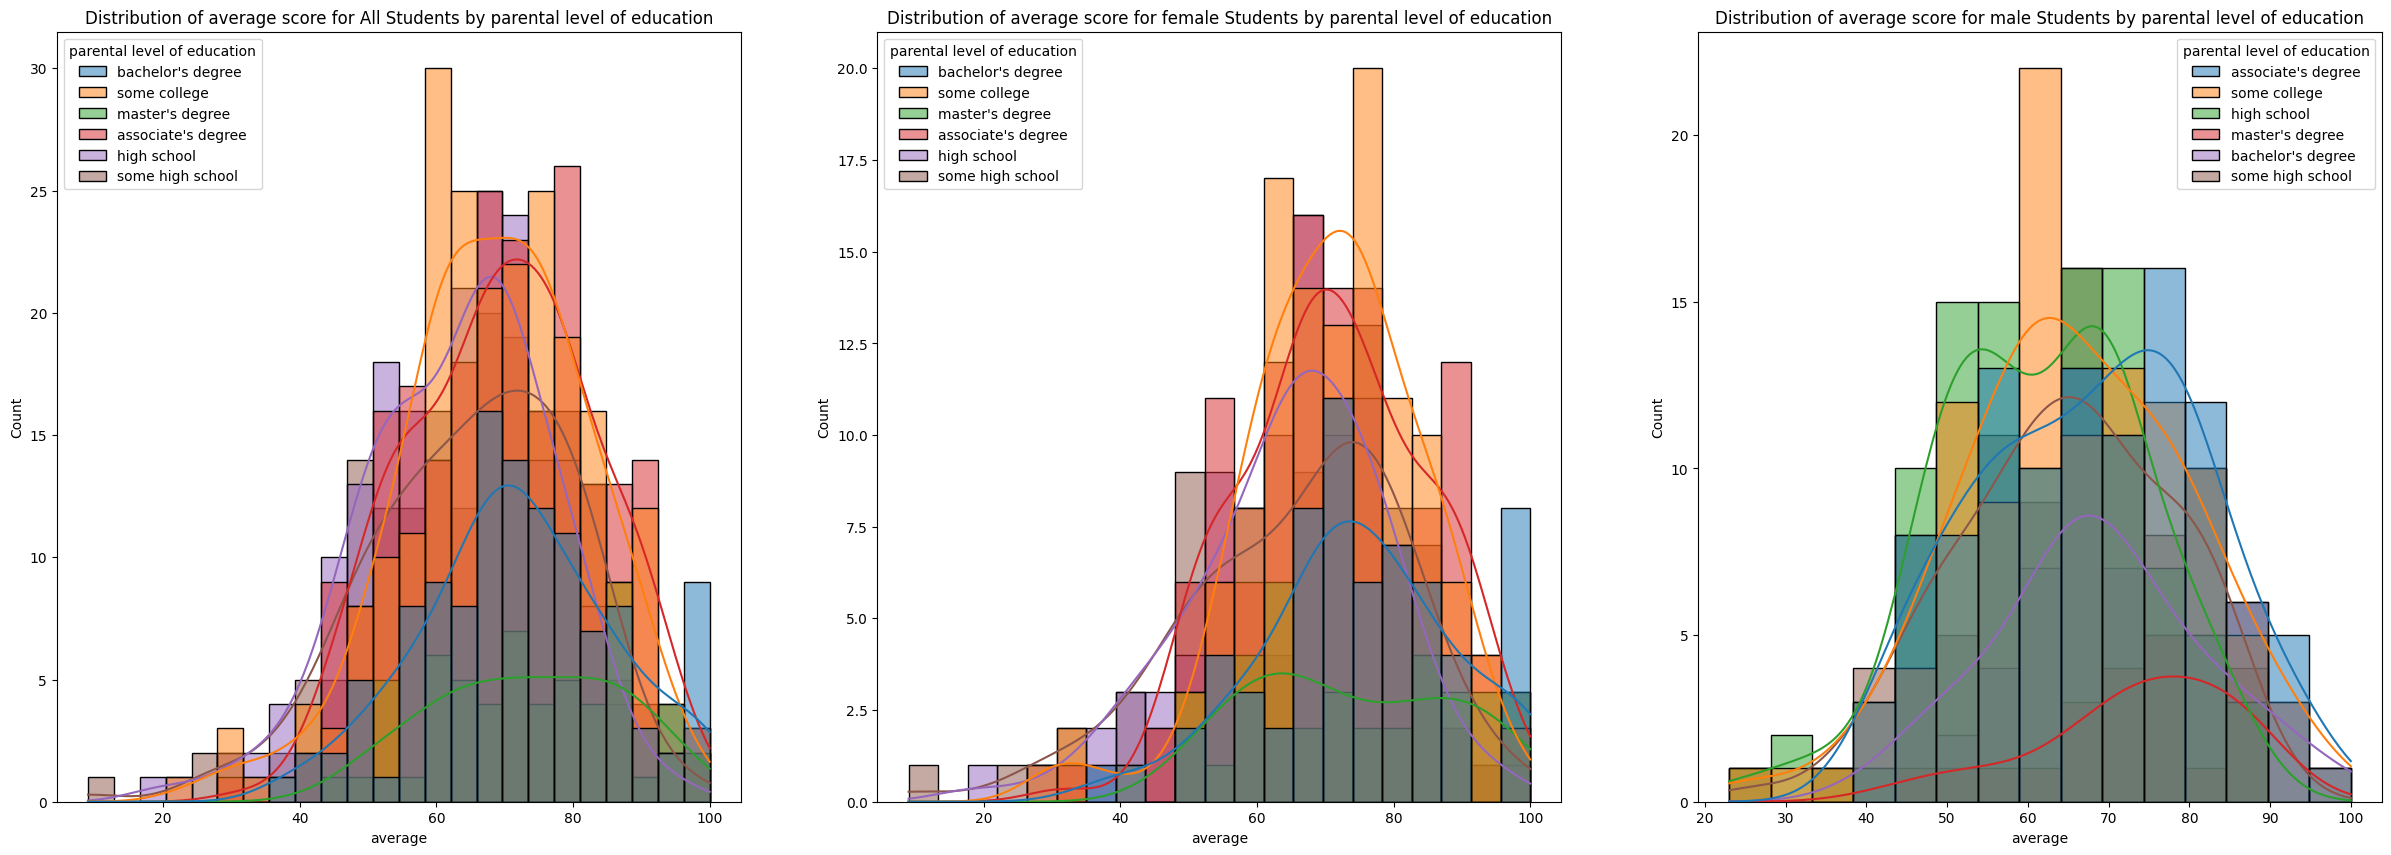

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))
sns.histplot(df, x='average', kde=True, hue='parental level of education', ax=axs[0])
axs[0].set_title('Distribution of average score for All Students by parental level of education')
sns.histplot(df[df['gender']=='female'], x='average', kde=True, hue='parental level of education', ax=axs[1])
axs[1].set_title('Distribution of average score for female Students by parental level of education')
sns.histplot(df[df['gender']=='male'], x='average', kde=True, hue='parental level of education', ax=axs[2])
axs[2].set_title('Distribution of average score for male Students by parental level of education')
plt.show()

## Insight

* In general parent's education doesn't seem like it's helping the students exam.
* The 3rd plot shows males students whose parents have a masters degree or associate degree seems to peform slightly better than others.



#### Now Let's see impact of Test preparation on students

In [42]:
male_test_course=df[df['gender']== 'male']['test preparation course'].value_counts()
female_test_course =df[df['gender']== 'female']['test preparation course'].value_counts()


print(f"Statistics of test preparation for male students {male_test_course}")
print('\n')
print(f"Statistics of test preparation for female students {female_test_course}")



1000
Statistics of test preparation for male students test preparation course
none         308
completed    174
Name: count, dtype: int64


Statistics of test preparation for female students test preparation course
none         334
completed    184
Name: count, dtype: int64


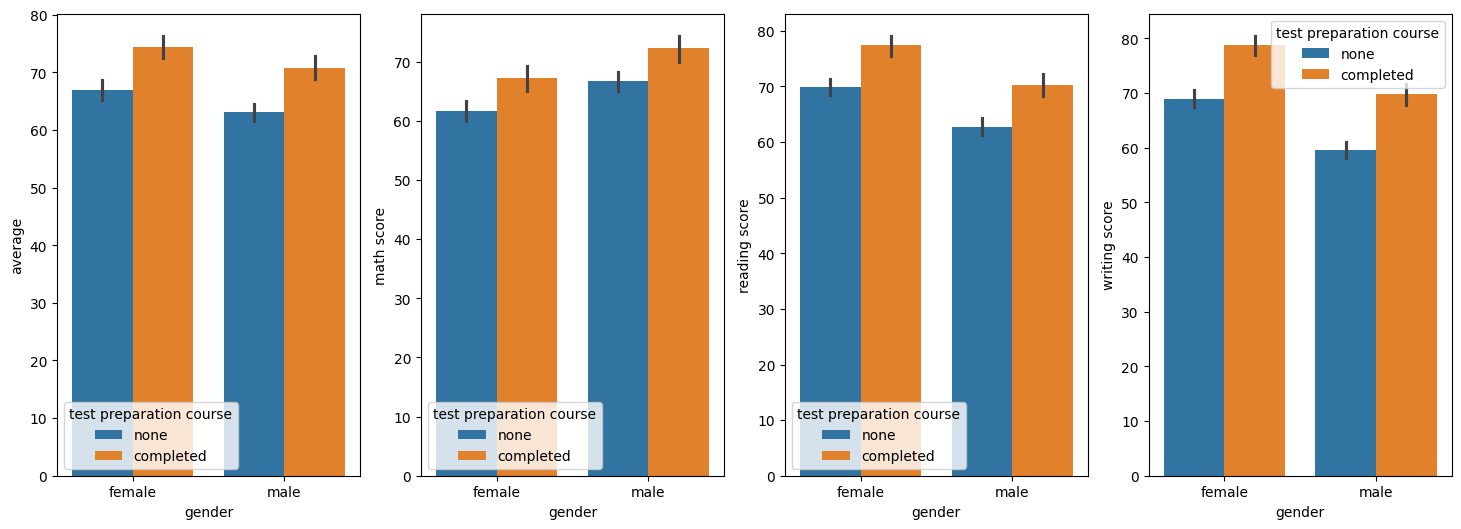

In [94]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.barplot(x=df['gender'], y=df['average'], hue=df['test preparation course'])
plt.subplot(1,4,2)
sns.barplot(x=df['gender'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,4,3)
sns.barplot(x=df['gender'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,4,4)
sns.barplot(x=df['gender'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

#### Check for Outliers

* extrem points
* boxplots

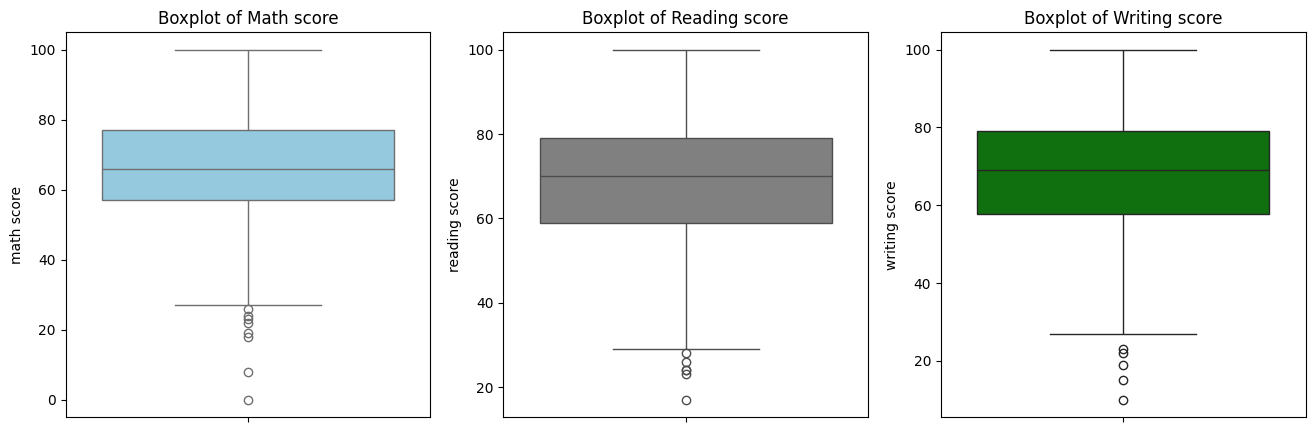

In [95]:
fig, axs = plt.subplots(1,3, figsize=(16,5))
sns.boxplot(df['math score'], color='skyblue', ax=axs[0])
axs[0].set_title("Boxplot of Math score")
sns.boxplot(df['reading score'], color='grey',ax=axs[1])
axs[1].set_title("Boxplot of Reading score")
sns.boxplot(df['writing score'], color='green', ax=axs[2])
axs[2].set_title("Boxplot of Writing score")
plt.show()

## Insight
* Some outliers in all of the numeric variables



#### Race/ethnicity impact on score


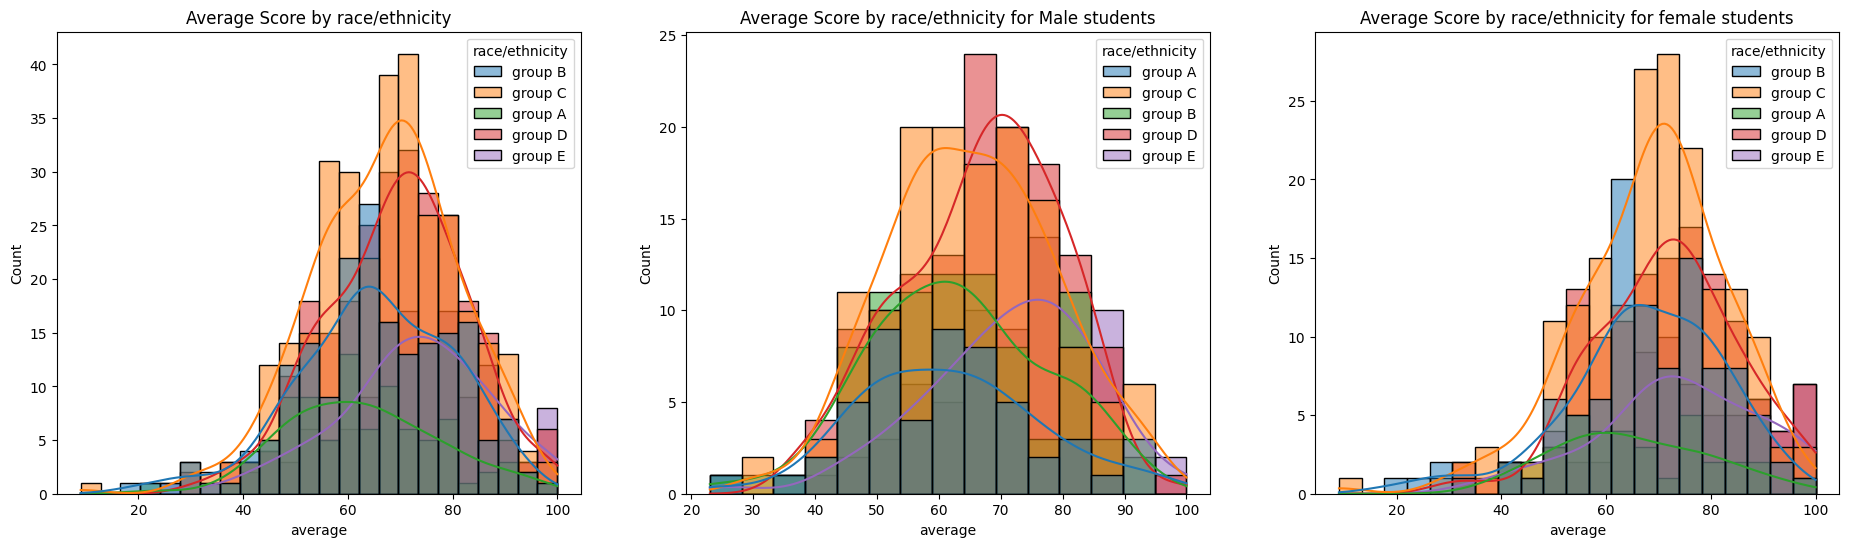

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(23, 6))

sns.histplot(df, x='average', kde=True, hue = 'race/ethnicity', ax=axs[0])
axs[0].set_title("Average Score by race/ethnicity")
sns.histplot(df[df.gender=='male'], x='average', kde=True, hue = 'race/ethnicity', ax=axs[1])
axs[1].set_title("Average Score by race/ethnicity for Male students")
sns.histplot(df[df.gender=='female'], x='average', kde=True, hue = 'race/ethnicity', ax=axs[2])
axs[2].set_title("Average Score by race/ethnicity for female students")
plt.show()


#### Insights:

* Students from group A and group B tends to perfom poorly in exam than the others regardless of gender.


### 4.2 Max score students in all subjects:

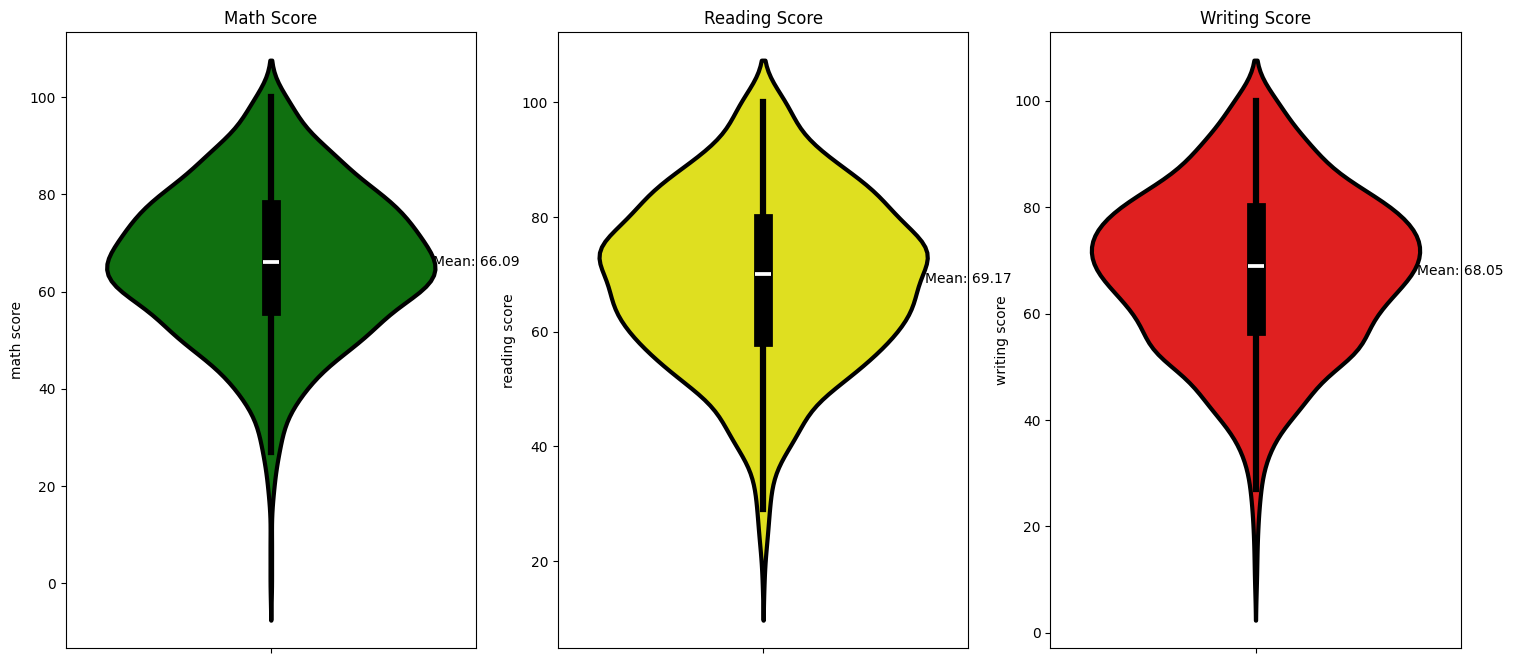

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Math Score
sns.violinplot(y='math score', data=df, color='green', linewidth=3, linecolor='black', ax=axs[0])
math_mean = df['math score'].mean()
axs[0].set_title("Math Score")
axs[0].text(0.5, math_mean, f'Mean: {math_mean:.2f}', color='black', ha='center', va='center')

# Reading Score
sns.violinplot(y='reading score', data=df, color='yellow', linewidth=3, linecolor='black', ax=axs[1])
reading_mean = df['reading score'].mean()
axs[1].set_title("Reading Score")
axs[1].text(0.5, reading_mean, f'Mean: {reading_mean:.2f}', color='black', ha='center', va='center')

# Writing Score
sns.violinplot(y='writing score', data=df, color='red', linewidth=3, linecolor='black', ax=axs[2])
writing_mean = df['writing score'].mean()
axs[2].set_title("Writing Score")
axs[2].text(0.5, writing_mean, f'Mean: {writing_mean:.2f}', color='black', ha='center', va='center')

plt.show()

#### Insight

* The mean scores for each of the exams (math, reading and writing) are close to each other. The mean of math's score of the students is slightly smaller than the rest. We might need more testing to see if thier difference is significant.



## Pie-chart of the categorical variables

(-1.25, 1.25, -1.25, 1.25)

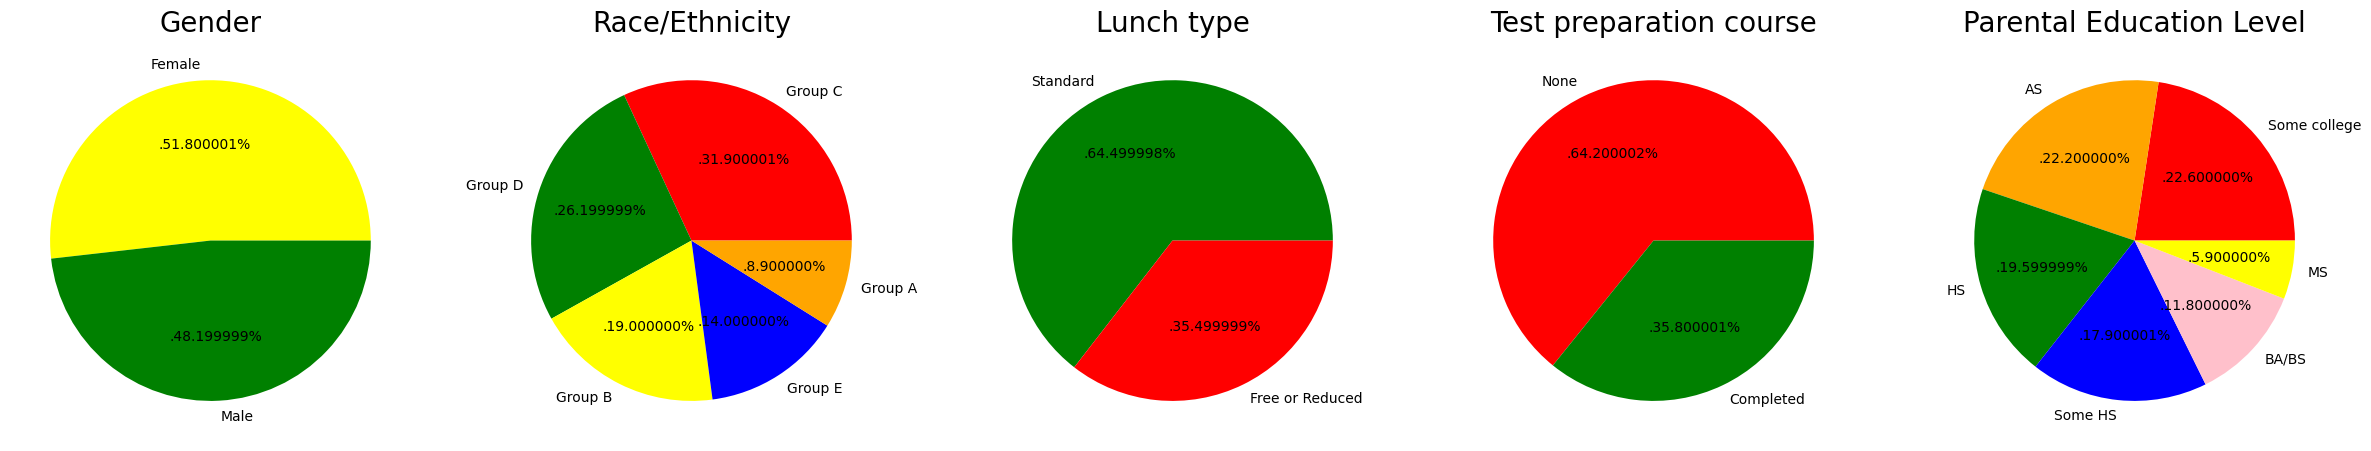

In [128]:
plt.rcParams['figure.figsize'] = (30, 12)
## Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['yellow', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
## Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'yellow', 'blue', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

## Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free or Reduced'
color = ['green', 'red']

plt.pie(size, colors=color, labels=labels, autopct='.%f%%')
plt.title('Lunch type', fontsize = 20)
plt.axis('off')

## Test preparation
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%f%%')
plt.title('Test preparation course', fontsize = 20)
plt.axis('off')

## Parental Education level
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some college', 'AS', 'HS', 'Some HS', 'BA/BS', 'MS'
color = ['red', 'orange', 'green', 'blue', 'pink', 'yellow']

plt.pie(size, colors=color, labels=labels, autopct='.%f%%')
plt.title('Parental Education Level', fontsize = 20)
plt.axis('off')




### Insight

* From the above plots we can see that the Number of female students is slightly greater than male students.
* The number of students is greatest in Group C and least in Group A
* Most of the students are on standard lunch 
* There are more students who haven't complated the test preparation course than who completed.
* Most of the studnets came from parants who have some collage education.


## Gender Impact on Exam core 

* Let's see this impact in more detalied way.



In [178]:
group_gender=df.groupby('gender')[['math score', 'reading score', 'writing score', 'average']].mean()
print(group_gender)

        math score  reading score  writing score    average
gender                                                     
female   63.633205      72.608108      72.467181  69.569498
male     68.728216      65.473029      63.311203  65.837483


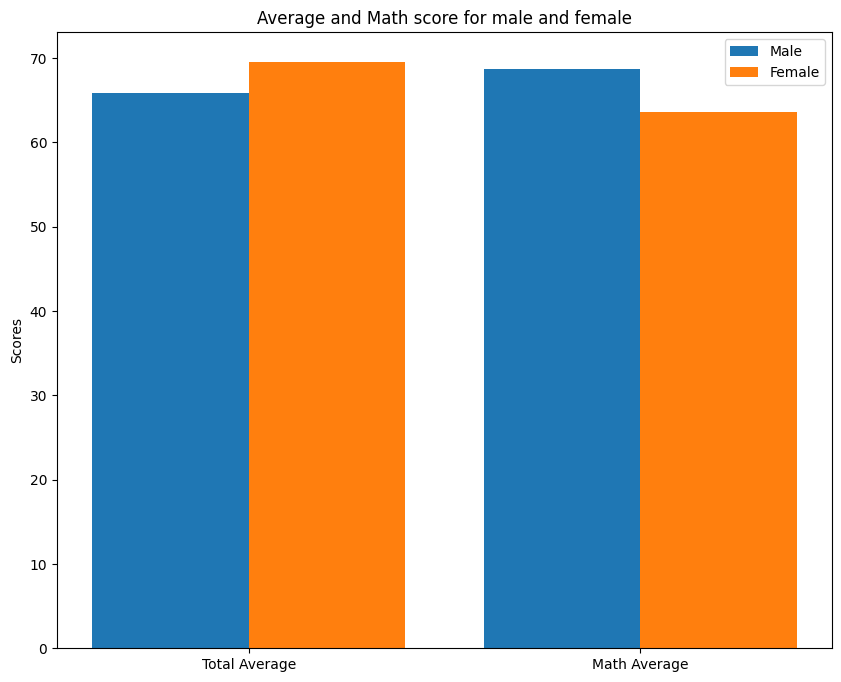

In [186]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']
female_scores = [group_gender['average'][0], group_gender['math score'][0]]
male_scores = [group_gender['average'][1], group_gender['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel('Scores')
plt.title('Average and Math score for male and female')
plt.legend()
plt.show()


### Race or Ethnicity

* Not sure what the Groups meant but we will assume they are features that shows the students backgrounds

In [193]:
group_race = df.groupby('race/ethnicity')
print(group_race['math score'].mean())
print(group_race['reading score'].mean())
print(group_race['writing score'].mean())
print(group_race['average'].mean())

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64
race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64
race/ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing score, dtype: float64
race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average, dtype: float64


In [199]:
group_race_mean = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score', 'average']].mean()
group_race_mean

,math score,reading score,writing score,average
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


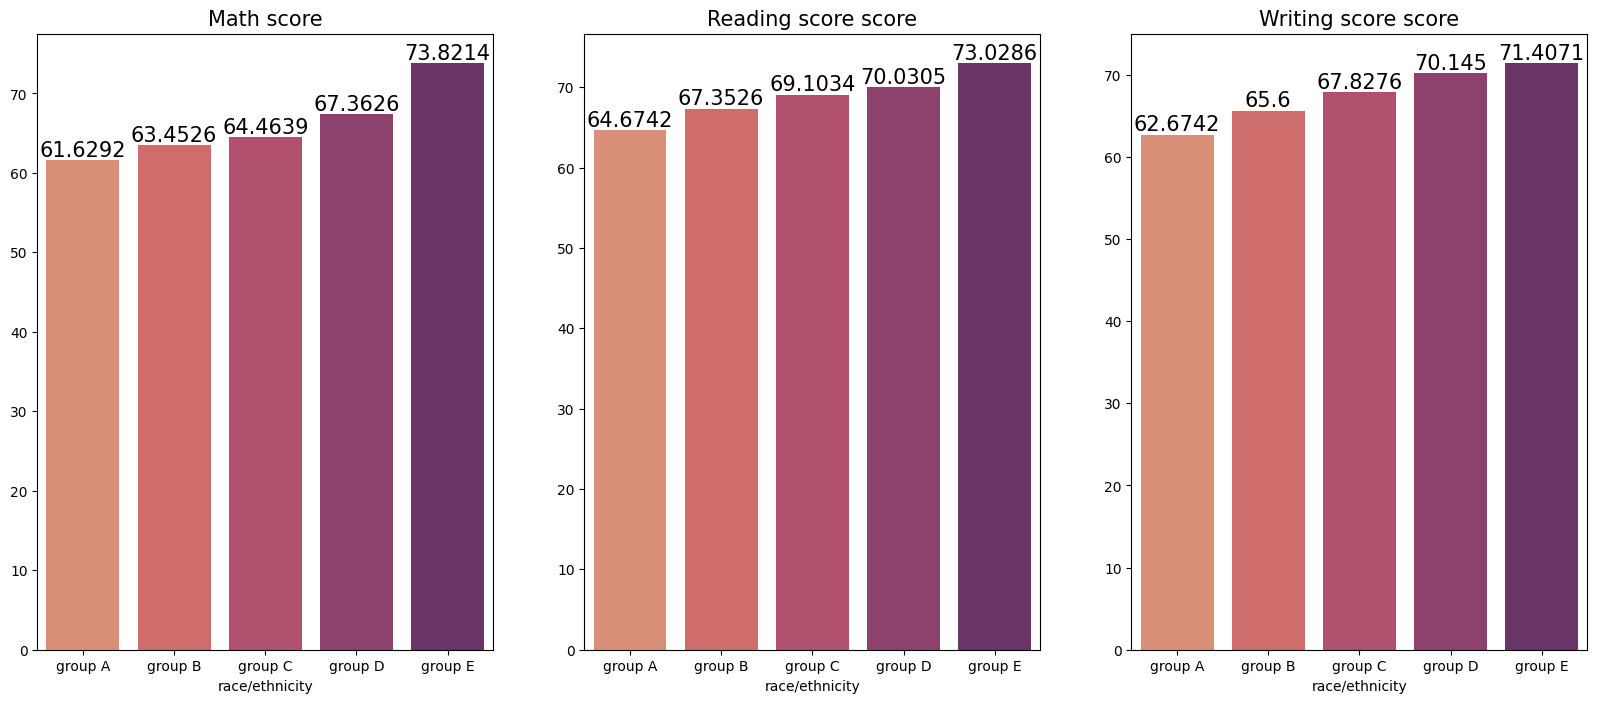

In [204]:
group_race = df.groupby('race/ethnicity')

f,ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=group_race['math score'].mean().index, y=group_race['math score'].mean().values, palette='flare', ax=ax[0])
ax[0].set_title('Math score', color='black', size=15)

for i in ax[0].containers:
    ax[0].bar_label(i, color='black', size=15)

sns.barplot(x=group_race['reading score'].mean().index, y=group_race['reading score'].mean().values,palette='flare' ,ax=ax[1])
ax[1].set_title('Reading score score', color='black', size=15)

for i in ax[1].containers:
    ax[1].bar_label(i, color='black', size=15)

sns.barplot(x=group_race['writing score'].mean().index, y=group_race['writing score'].mean().values,palette='flare' ,ax=ax[2])
ax[2].set_title('Writing score score', color='black', size=15)

for i in ax[2].containers:
    ax[2].bar_label(i, color='black', size=15)

### Parental Education Level

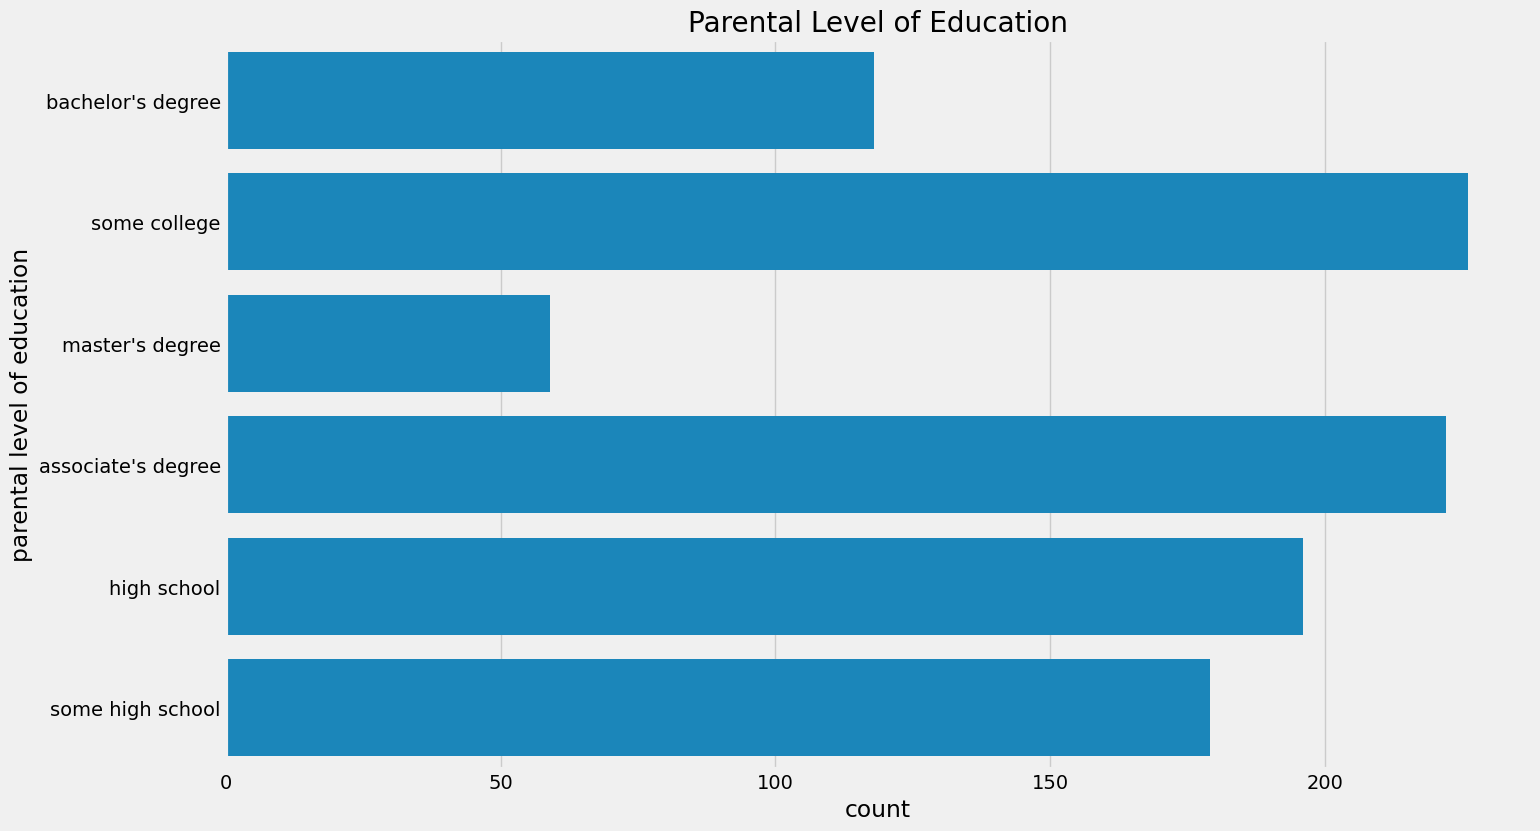

In [208]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'])
plt.title('Parental Level of Education')
plt.show()

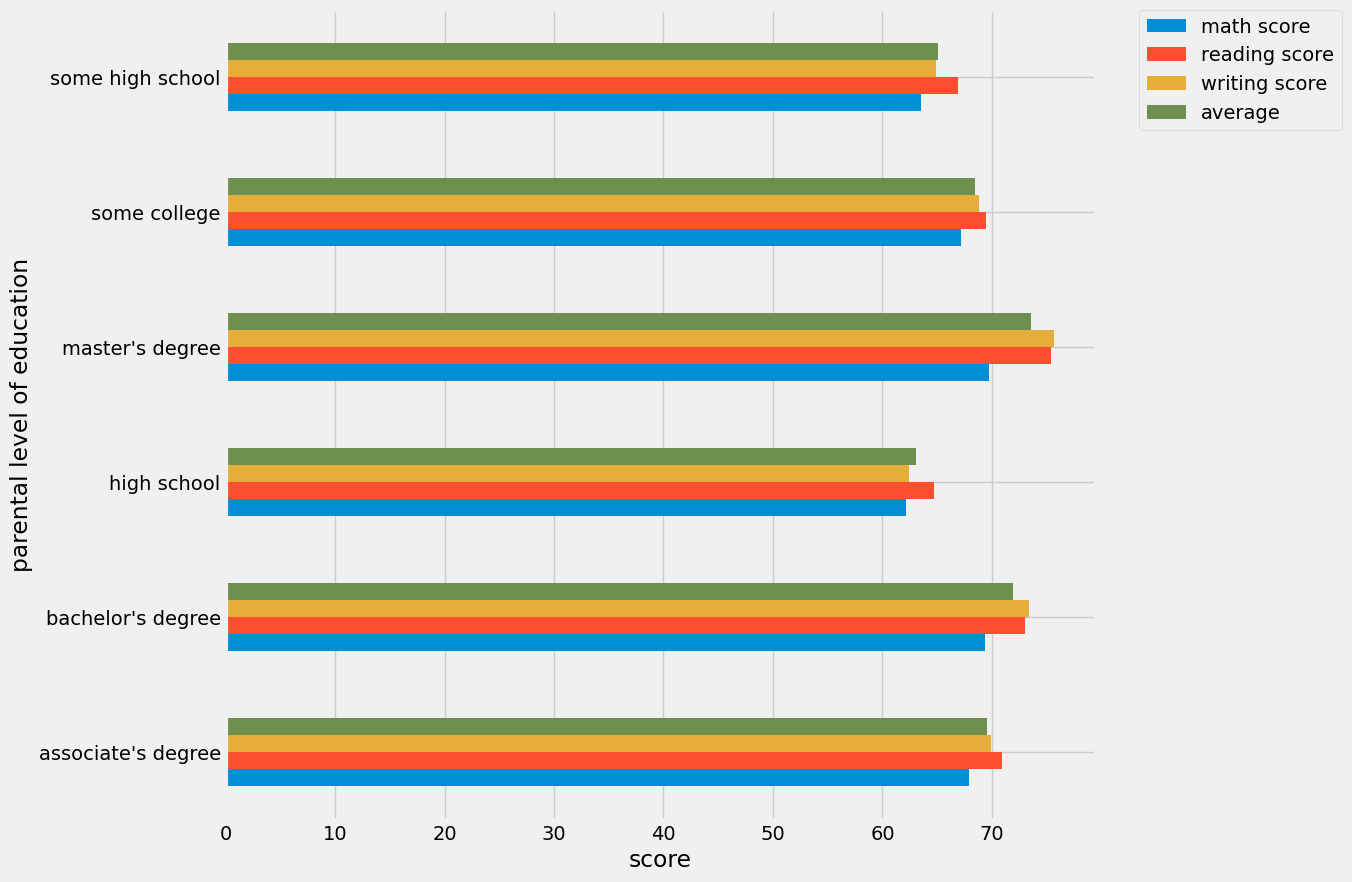

In [213]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'average']].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('score')
plt.show()

### More insights:

1.  On average score females performed better than male.
2.  Males outperfomed females on math score.
3.  Most students belongs to group C and D while the lowest number of students came from Group A
4.  Average score of students from Group E is the highest and Group A students have the least average score in all three exams.
5.  Most students didn't prepare for the test or complated the test preparation course. But those who completed performed better than the students who didn't complete.
6. Students whose parents have advanced degree performed better.


### In conclustion:

* Being from a particular race/ethinicity impacted the score in all cases
* Having standard lunch or free lunch had impact on the students performance.
* Test preparation has a positive impact on exam score
* Females perform better than males in average scores, while males perform better in math score.
